In [1]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Loads array of train axial 0000.npy
axial0000 = np.load(r'C:/Users/bliu0/Downloads/MRnet-v1.0/train/axial/0000.npy')

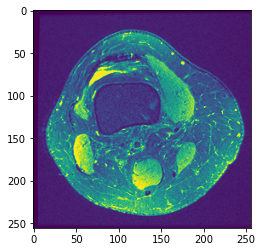

In [3]:
# Visualize np array, axial 0000
imgplot = plt.imshow(axial0000[9])

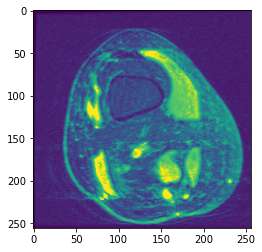

In [4]:
# Visualize axial 1152 array
imgplot1 = plt.imshow(np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/1152.npy')[0])

In [42]:
# LOADING DATA
train_data = []
test_data = []

In [43]:
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'):
    try:
        train_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/coronal/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/sagittal/'+x)[0]/255])
    except:
        print(x)
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'):
    try:
        test_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/coronal/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/sagittal/'+x)[0]/255])
    except:
        print(x)

.DS_Store


In [45]:
np.array(train_data).shape

(1130, 3, 256, 256)

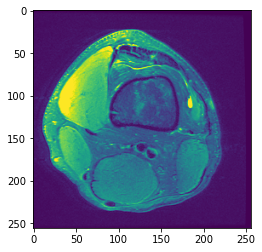

In [46]:
plt.imshow(train_data[5][0])

In [47]:
train_data

[[array([[0.        , 0.        , 0.        , ..., 0.01960784, 0.01568627,
          0.01176471],
         [0.        , 0.        , 0.        , ..., 0.03137255, 0.02352941,
          0.03137255],
         [0.        , 0.        , 0.        , ..., 0.05490196, 0.04313725,
          0.04313725],
         ...,
         [0.        , 0.        , 0.        , ..., 0.0627451 , 0.05882353,
          0.04705882],
         [0.        , 0.        , 0.        , ..., 0.04705882, 0.05098039,
          0.04705882],
         [0.        , 0.        , 0.        , ..., 0.04313725, 0.02745098,
          0.03529412]]),
  array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
          0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
          0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00784314, 0.00392157,
          0.00784314],
         ...,
         [0.        , 0.        , 0.        , ..., 0.00784314, 0.00784314,
          0.0

In [48]:
# LOADING LABELS FROM CSV
train_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-abnormal.csv', index_col=0)
train_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-meniscus.csv', index_col=0)
test_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-abnormal.csv', index_col=0)
test_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-acl.csv', index_col=0)
test_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-meniscus.csv', index_col=0)

In [49]:
train_labels = [[[1,0,0],[1,0,0],[1,0,0]]] 
test_labels = [[[0,0,0],[0,0,0],[0,0,0]]]

In [50]:
for x in range(1129):
  train_labels.append([])  
  train_labels[x+1].append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
  train_labels[x+1].append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
  train_labels[x+1].append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
for x in range(119):
  test_labels.append([])  
  test_labels[x+1].append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])
  test_labels[x+1].append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])
  test_labels[x+1].append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])

In [51]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [52]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [53]:
train_data.shape,train_labels.shape

((1130, 3, 256, 256), (1130, 3, 3))

In [54]:
train_data.shape

(1130, 3, 256, 256)

In [55]:
test_labels.shape

(120, 3, 3)

In [56]:
hi = [1,2,3]
hi = np.array(hi)
hi.shape

(3,)

# Model

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(3,256,256)),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(3,activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,epochs=5)

Epoch 1/5


ValueError: in user code:

    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\bliu0\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 3) vs (None, 3, 3))


In [28]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 50ms/step - loss: 0.7258 - accuracy: 1.0000


[0.7257871031761169, 1.0]

In [27]:
model.predict(test_data)

array([[0.7254145 , 0.14963648, 0.10712522],
       [0.5491771 , 0.08096218, 0.04280838],
       [0.9581326 , 0.2140153 , 0.44775695],
       [0.24491006, 0.0508334 , 0.01159209],
       [0.9739317 , 0.00809884, 0.59364665],
       [0.993316  , 0.3002004 , 0.8964714 ],
       [0.7299886 , 0.05887607, 0.14424336],
       [0.98645467, 0.19073448, 0.78575915],
       [0.84286726, 0.13591799, 0.15368187],
       [0.8778494 , 0.02882141, 0.3226913 ],
       [0.99510235, 0.13095888, 0.853759  ],
       [0.98641074, 0.2359398 , 0.8730087 ],
       [0.959941  , 0.09432176, 0.59195244],
       [0.9433572 , 0.10143867, 0.68891484],
       [0.9714122 , 0.02564543, 0.45813715],
       [0.9077672 , 0.07082972, 0.23727596],
       [0.36801898, 0.11767894, 0.04630062],
       [0.519576  , 0.0868187 , 0.09604931],
       [0.9771735 , 0.09979746, 0.64406407],
       [0.8173462 , 0.25289077, 0.3762055 ],
       [0.93482566, 0.05487099, 0.5056884 ],
       [0.9917898 , 0.02290305, 0.43858904],
       [0.

In [21]:
test_labels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1,